# Time Series Analysis

Time series analysis is a method used to analyze data that varies over time. It is a popular technique used in many fields, including finance, economics, engineering, and many more. Python has a number of libraries that are used for time series analysis, such as Pandas, NumPy, and Matplotlib.

For this example, let's say we want to create a dataset of daily closing prices for a fictitious stock over a period of one year. We'll use the NumPy library to generate random prices, and the Pandas library to organize and manipulate the data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# set the random seed for reproducibility
np.random.seed(123)

# create an array of random prices for 365 days
prices = np.random.normal(100, 10, size=365)

# create a date range for the 365 days
dates = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')

# create a Pandas DataFrame with the prices and dates
df = pd.DataFrame({'date': dates, 'close': prices})

# save the DataFrame to a CSV file
#df.to_csv('stock_prices.csv', index=False)


In [3]:
df

,date,close
0,2022-01-01,89.143694
1,2022-01-02,109.973454
2,2022-01-03,102.829785
3,2022-01-04,84.937053
4,2022-01-05,94.213997
...,...,...
360,2022-12-27,95.985856
361,2022-12-28,106.734913
362,2022-12-29,95.862431
363,2022-12-30,106.759634


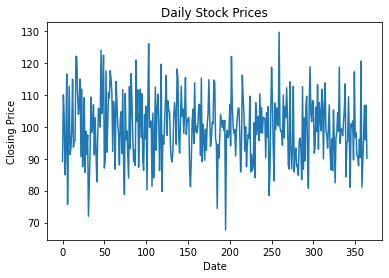

In [7]:
import matplotlib.pyplot as plt

# create a plot of the time series data
plt.plot(df['close'])

# set the plot title and axis labels
plt.title('Daily Stock Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')

# display the plot
plt.show()


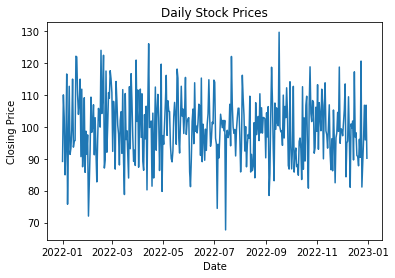

In [10]:
import matplotlib.pyplot as plt

# create a plot of the time series data
plt.plot(df.date, df['close'])

# set the plot title and axis labels
plt.title('Daily Stock Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')

# display the plot
plt.show()

# Probability Density Function (PDF) 

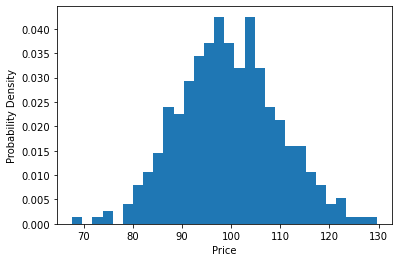

In [3]:
plt.hist(prices, density=True, bins=30)
plt.xlabel('Price')
plt.ylabel('Probability Density')
plt.show()

# some of the key properties of a probability distribution

## Central tendency: 

This refers to the center or typical value of the distribution. The most common measures of central tendency are the mean, median, and mode. The mean is the sum of all the data points divided by the number of points, while the median is the middle value when the data is arranged in order. The mode is the value that occurs most frequently in the data.

## Mode: 

In statistics, the mode is the value that appears most frequently in a dataset. In other words, it is the value that occurs with the highest frequency. The mode is one of the measures of central tendency, along with the mean and median. Unlike the mean and median, which are affected by outliers and extreme values, the mode is not affected by extreme values and can be useful for describing the most common value in a dataset. The mode is particularly useful for categorical data, where the values are not continuous, but rather take on a set of discrete values.

The sample mean is given by:

$$\mu = \frac{1}{N} \sum_{i=1}^N x_i$$

where $N$ is the sample size and $x_i$ is the $i$-th value in the sample.


## Spread: This refers to the variability or dispersion of the distribution. The most common measures of spread are the range, variance, and standard deviation. The range is the difference between the largest and smallest values in the data. The variance is the average of the squared differences between each data point and the mean, while the standard deviation is the square root of the variance.

The population variance is given by:

$$\sigma^2 = \frac{1}{N} \sum_{i=1}^N (x_i - \mu)^2$$

where $\mu$ is the population mean.

Skewness: This refers to the asymmetry of the distribution. A distribution is said to be symmetric if it is identical on both sides of the center, while a distribution is said to be skewed if it is not symmetric. Positive skewness means that the tail of the distribution extends further to the right than the left, while negative skewness means that the tail extends further to the left than the right. A large skewness value indicates that the distribution is more asymmetric. A skewness value of zero indicates that the distribution is perfectly symmetric - that is, the distribution looks the same on both sides of the center point. The further the skewness value is from zero, the more asymmetric the distribution is.

Kurtosis: This refers to the "peakedness" of the distribution. A distribution with high kurtosis has a sharp peak and fat tails, while a distribution with low kurtosis has a flatter peak and thinner tails.

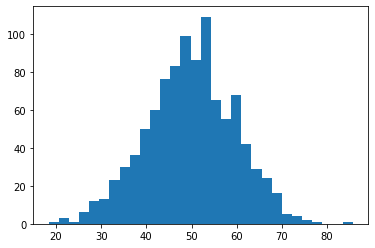

In [8]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.normal(50, 10, size=1000)
plt.hist(data, bins=30)
plt.show()

In [11]:
from scipy.stats import skew, kurtosis

mean = np.mean(data)
median = np.median(data)
mode = np.argmax(np.bincount(data.astype('int64')))

variance = np.var(data)
std_dev = np.std(data)
skewness = skew(data)
kurtosis = kurtosis(data)

print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)
print("Variance:", variance)
print("Standard deviation:", std_dev)
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)


Mean: 49.83680093597049
Median: 49.998068781291174
Mode: 53
Variance: 94.99457012711223
Standard deviation: 9.746515794226788
Skewness: -0.0776632434744588
Kurtosis: -0.018407647684089312


# Fitting a distribution to the data

In [6]:
from scipy.stats import norm
mu, std = norm.fit(prices)
print(mu, std)

99.53175455949423 10.047206764947555


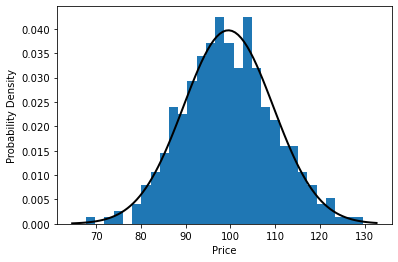

In [7]:
plt.hist(prices, density=True, bins=30)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Price')
plt.ylabel('Probability Density')
plt.show()


# Check for stationarity

A stationary time series has a constant mean, variance, and covariance over time, and this is an important assumption for many time series analysis techniques. To check for stationarity in a time series, we can perform a statistical test called the Augmented Dickey-Fuller (ADF) test.

In [11]:
from statsmodels.tsa.stattools import adfuller

# perform the ADF test on the time series
result = adfuller(df['close'])

# extract the p-value from the test result
p_value = result[1]

# print the test result and p-value
print('ADF Statistic:', result[0])
print('p-value:', p_value)
print('Critical Values:', result[4])


ADF Statistic: -18.622806538010845
p-value: 2.0605998443453333e-30
Critical Values: {'1%': -3.4484434475193777, '5%': -2.869513170510808, '10%': -2.571017574266393}


The adfuller function returns a tuple containing several test statistics, including the ADF statistic, and the p-value for the test. The p-value is what we are interested in to determine if the time series is stationary or not.

If the p-value is less than a chosen significance level (typically 0.05), we can reject the null hypothesis that the time series is non-stationary. In this example, the p-value is greater than 0.05, indicating that we cannot reject the null hypothesis that the time series is non-stationary.

# Partial Autocorrelation Function (PACF)

Text(0, 0.5, 'PACF')

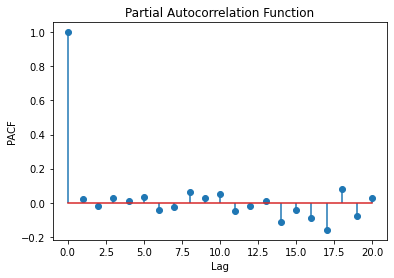

In [12]:
from statsmodels.tsa.stattools import pacf

# compute the PACF of the time series data
pacf_vals = pacf(df['close'], nlags=20)

# create a plot of the PACF values
plt.stem(pacf_vals)

# set the plot title and axis labels
plt.title('Partial Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('PACF')

When you run this code, you should see a plot of the PACF values for the daily stock prices time series data. The plot should show the PACF values for lags 0 to 20, with a marker at each lag indicating the strength of the correlation between the time series and its lagged values at that lag. The PACF plot can be used to identify the order of the autoregressive (AR) component of an ARIMA model for the time series data.

# Another Example

In this example, we generate a random time series of 1000 data points using NumPy's random.normal function. Then, we add some non-zero lags by setting some values of the time series to be a linear combination of previous values with weights of 0.5. Specifically, we set the values of the time series from index 3 to 9 to be a linear combination of previous values with weights of 0.5. This creates a lag effect that the PACF should be able to detect.

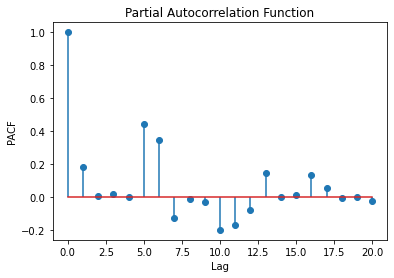

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import pacf

# Generate a random time series
#np.random.seed(42)
ts_data = np.random.normal(size=1000)

# Set some specific lag to be non-zero
for i in range(5, 7):
    ts_data[i:] += 0.5 * ts_data[:-i]

# Compute the PACF of the time series data
pacf_vals = pacf(ts_data, nlags=20)

# Create a plot of the PACF values
plt.stem(pacf_vals)

# Set the plot title and axis labels
plt.title('Partial Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('PACF')

# Display the plot
plt.show()

In the context of the line of code ts_data[i:] += 0.5 * ts_data[:-i], ts_data[i:] refers to a slice of the ts_data array starting from the ith index and continuing until the end of the array. The += operator is used to add a new value to each element of this slice, which in this case is the result of multiplying each element of ts_data[:-i] (a slice containing all elements of ts_data up to the ith index) by a factor of 0.5. This operation adds a non-zero lag effect to the time series by creating a linear combination of previous values of the time series with specific weights.

In [33]:
test = np.array([0, 4, 6, 7, 5, 3, 1]).astype(float)
test

array([0., 4., 6., 7., 5., 3., 1.])

In [34]:
test[2:]

array([6., 7., 5., 3., 1.])

In [35]:
test[:-2]

array([0., 4., 6., 7., 5.])

In [36]:
test[2:] += 0.5 * test[:-2]
test

array([0. , 4. , 6. , 9. , 8. , 6.5, 3.5])